# Impor packages

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\USER\\Project_Python\\MySkill\\User Retention Analysis_Online Retail Data'

# Memuat Dataset

In [3]:
df = pd.read_csv('Online Retail Data.csv', header=0)
df.head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0
1,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN


In [4]:
df.tail()

,order_id,product_code,product_name,quantity,order_date,price,customer_id
461768,539991,21618,4 WILDFLOWER BOTANICAL CANDLES,1,2010-12-23 16:49:00,1.25,NaN
461769,539991,72741,GRAND CHOCOLATECANDLE,4,2010-12-23 16:49:00,1.45,NaN
461770,539992,21470,FLOWER VINE RAFFIA FOOD COVER,1,2010-12-23 17:41:00,3.75,NaN
461771,539992,22258,FELT FARM ANIMAL RABBIT,1,2010-12-23 17:41:00,1.25,NaN
461772,539992,21155,RED RETROSPOT PEG BAG,1,2010-12-23 17:41:00,2.10,NaN


## Assessing Data

**Memeriksa tipe data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461773 entries, 0 to 461772
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      461773 non-null  object 
 1   product_code  461773 non-null  object 
 2   product_name  459055 non-null  object 
 3   quantity      461773 non-null  int64  
 4   order_date    461773 non-null  object 
 5   price         461773 non-null  float64
 6   customer_id   360853 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 24.7+ MB


### Insight :
- **Missing Values**: Ada nilai yang hilang dalam kolom `product_name` dan `customer_id`. Ini perlu ditangani dalam langkah pembersihan data.
- **Tipe Data**: Kolom `order_date` sebaiknya dikonversi ke tipe datetime untuk analisis lebih lanjut yang melibatkan tanggal.
- **Jumlah Data**: Dengan lebih dari 460 ribu entri, data ini cukup besar dan mungkin memerlukan teknik khusus untuk pemrosesan efisien.

**Menghitung jumlah nilai unik di setiap kolom**

In [6]:
df.nunique()

order_id        25301
product_code     4508
product_name     4491
quantity          737
order_date      22368
price            1448
customer_id      3940
dtype: int64

**Memeriksa duplikasi data**

In [7]:
# Menghitung & Menampilkan jumlah baris dengan duplikasi values

print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  6479


In [8]:
from fast_ml.feature_selection import get_duplicate_features

# Mendapatkan kolom-kolom dengan duplikasi values
duplicate_features = get_duplicate_features(df)
print('Duplikasi kolom:\n')
print(duplicate_features)

Duplikasi kolom:

Empty DataFrame
Columns: [Desc, feature1, feature2]
Index: []


**Memeriksa missing values**

In [9]:
print(df.isnull().sum())

order_id             0
product_code         0
product_name      2718
quantity             0
order_date           0
price                0
customer_id     100920
dtype: int64


**Memeriksa parameter statistik dari kolom numerik**

In [10]:
df.describe()

,quantity,price,customer_id
count,461773.000000,461773.000000,360853.000000
mean,9.088892,4.569963,15557.611138
std,86.366467,153.411566,1593.728741
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,14210.000000
50%,3.000000,2.100000,15580.000000
75%,10.000000,4.210000,16938.000000
max,10200.000000,25111.090000,18287.000000


### Insight :
- **Outliers dan Data Kotor**: Terdapat nilai negatif dalam kolom `quantity` dan `price` yang mungkin perlu ditinjau dan diperbaiki atau dihapus.
- **Distribusi Data**: Terdapat variasi yang besar dalam data, baik dalam jumlah barang yang dipesan maupun harga barang.
- **Missing Values**: Sejumlah besar baris tidak memiliki `customer_id`, yang dapat mempengaruhi analisis retensi pengguna.

Analisis lebih lanjut dapat dilakukan untuk **menangani outliers, missing values, dan mengidentifikasi pola-pola penting dalam data.**

# Data Cleansing

**Menangani tipe data**

In [11]:
# mengkonversi kolom order_date menjadi datetime
df['order_date'] = pd.to_datetime(df['order_date'])

In [12]:
# membuat kolom year_month
df['year_month'] = df['order_date'].dt.to_period('M')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461773 entries, 0 to 461772
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      461773 non-null  object        
 1   product_code  461773 non-null  object        
 2   product_name  459055 non-null  object        
 3   quantity      461773 non-null  int64         
 4   order_date    461773 non-null  datetime64[ns]
 5   price         461773 non-null  float64       
 6   customer_id   360853 non-null  float64       
 7   year_month    461773 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(3), period[M](1)
memory usage: 28.2+ MB


**Menangani missing value**

In [14]:
df[df.customer_id.isna()].head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id,year_month
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN,2010-01
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN,2010-01
5,493413,21723,ALPHABET HEARTS STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN,2010-01
477,493485,72008,FROSTED BOX 9 WHITE T-LIGHT CANDLES,24,2010-01-04 14:48:00,0.42,NaN,2010-01
478,493485,21589,SWALLOW GIANT TUBE MATCHES,2,2010-01-04 14:48:00,2.55,NaN,2010-01


In [15]:
# menghapus semua baris tanpa customer_id
df = df[~df['customer_id'].isna()]

In [16]:
df[df.product_name.isna()].head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id,year_month


In [17]:
print(df.isnull().sum())

order_id        0
product_code    0
product_name    0
quantity        0
order_date      0
price           0
customer_id     0
year_month      0
dtype: int64


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360853 entries, 0 to 461744
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      360853 non-null  object        
 1   product_code  360853 non-null  object        
 2   product_name  360853 non-null  object        
 3   quantity      360853 non-null  int64         
 4   order_date    360853 non-null  datetime64[ns]
 5   price         360853 non-null  float64       
 6   customer_id   360853 non-null  float64       
 7   year_month    360853 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(3), period[M](1)
memory usage: 24.8+ MB


**Menangani value pada kolom product_code dan product_name yang mengandung kata "test"**

In [19]:
# Memfilter baris yang product_code atau product_name mengandung kata 'test'
df_filtered = df[(df['product_code'].str.contains('test', case=False, na=False)) | (df['product_name'].str.contains('test', case=False, na=False))]

# Menampilkan hasil
df_filtered.head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id,year_month
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.5,12346.0,2010-01
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.5,12346.0,2010-01
10146,494450,TEST001,This is a test product.,5,2010-01-14 13:50:00,4.5,12346.0,2010-01
19402,495295,TEST001,This is a test product.,5,2010-01-22 13:30:00,4.5,12346.0,2010-01
40332,497819,TEST001,This is a test product.,5,2010-02-12 14:58:00,0.0,14103.0,2010-02


In [20]:
# menghapus semua baris dengan product_code atau product_name test
df = df[(~df['product_code'].str.lower().str.contains('test')) |
        (~df['product_name'].str.contains('test '))]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360842 entries, 1 to 461744
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      360842 non-null  object        
 1   product_code  360842 non-null  object        
 2   product_name  360842 non-null  object        
 3   quantity      360842 non-null  int64         
 4   order_date    360842 non-null  datetime64[ns]
 5   price         360842 non-null  float64       
 6   customer_id   360842 non-null  float64       
 7   year_month    360842 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(3), period[M](1)
memory usage: 24.8+ MB


**Menangani duplikasi data**

In [22]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  6411


In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354431 entries, 1 to 461744
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      354431 non-null  object        
 1   product_code  354431 non-null  object        
 2   product_name  354431 non-null  object        
 3   quantity      354431 non-null  int64         
 4   order_date    354431 non-null  datetime64[ns]
 5   price         354431 non-null  float64       
 6   customer_id   354431 non-null  float64       
 7   year_month    354431 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(3), period[M](1)
memory usage: 24.3+ MB


**Menangani Inaccurate value**

In [25]:
# mengubah nilai quantity yang negatif menjadi positif karena nilai negatif tersebut hanya menandakan order tersebut cancelled
df['quantity'] = df['quantity'].abs()

In [26]:
# membuat semua product_name berhuruf kecil
df['product_name'] = df['product_name'].str.lower()

**Membuat kolom baru**

In [27]:
# membuat kolom order_status dengan nilai 'cancelled' jika order_id diawali dengan huruf 'c' dan 'delivered' jika order_id tanpa awalan huruf 'c'
df['order_status'] = np.where(df['order_id'].str[:1]=='C', 'cancelled', 'delivered')

In [28]:
# membuat nilai amount, yaitu perkalian antara quantity dan price
df['amount'] = df['quantity'] * df['price']

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354431 entries, 1 to 461744
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      354431 non-null  object        
 1   product_code  354431 non-null  object        
 2   product_name  354431 non-null  object        
 3   quantity      354431 non-null  int64         
 4   order_date    354431 non-null  datetime64[ns]
 5   price         354431 non-null  float64       
 6   customer_id   354431 non-null  float64       
 7   year_month    354431 non-null  period[M]     
 8   order_status  354431 non-null  object        
 9   amount        354431 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4), period[M](1)
memory usage: 29.7+ MB


**Mengganti product_name dari product_code yang memiliki beberapa product_name dengan salah satu product_name-nya yang paling sering muncul**

Langkah ini penting dalam analisis retensi pengguna untuk beberapa alasan penting:

### Konsistensi dan Keakuratan Data:
- **Mengatasi Ambiguitas**: Kode produk (`product_code`) yang sama mungkin memiliki beberapa nama produk (`product_name`) yang berbeda di dalam dataset Anda. Ini dapat terjadi karena kesalahan input data, variasi penamaan, atau pembaruan produk. Menggunakan satu nama produk yang paling sering muncul untuk setiap kode produk membantu mengatasi ambiguitas ini dan memastikan konsistensi data.
- **Mengeliminasi Kebingungan**: Dengan memilih nama produk yang paling sering muncul, kita mengeliminasi kebingungan yang mungkin timbul akibat adanya beberapa nama produk untuk satu kode produk yang sama. Hal ini membuat analisis data menjadi lebih sederhana dan dapat diandalkan.

### Mempermudah Analisis dan Visualisasi:
- **Ringkas dan Jelas**: Dataset yang lebih ringkas dengan nama produk yang seragam untuk setiap kode produk akan mempermudah analisis lebih lanjut dan visualisasi data. Ini membantu dalam memahami tren dan pola dengan lebih cepat dan jelas.
- **Efektivitas Penjualan**: Mengetahui produk mana yang paling sering dipesan di antara berbagai nama produk yang ada membantu dalam menilai efektivitas dan popularitas produk, yang merupakan bagian penting dari analisis retensi pengguna.

### Peningkatan Model Prediksi:
- **Model Prediktif yang Lebih Baik**: Dengan data yang lebih konsisten, model prediksi dapat dilatih dengan lebih baik dan memberikan hasil yang lebih akurat. Variasi dalam penamaan produk dapat menjadi gangguan dalam proses pelatihan model machine learning, sehingga dengan mengurangi variasi ini, kita mendapatkan model yang lebih kuat.
- **Analisis Tren yang Akurat**: Menggunakan nama produk yang konsisten untuk setiap kode produk membantu dalam melakukan analisis tren yang lebih akurat. Anda dapat mengidentifikasi tren popularitas produk dari waktu ke waktu dengan lebih tepat.

Langkah ini secara keseluruhan meningkatkan kualitas data yang digunakan dalam analisis retensi pengguna, yang pada akhirnya membantu dalam membuat keputusan bisnis yang lebih baik dan strategi retensi yang lebih efektif.

In [31]:
# mengganti product_name dari product_code yang memiliki beberapa product_name dengan salah satu product_name-nya yang paling sering muncul
most_freq_product_name = df.groupby(['product_code','product_name'], as_index=False).agg(order_cnt=('order_id','nunique')).sort_values(['product_code','order_cnt'], ascending=[True,False])
most_freq_product_name

,product_code,product_name,order_cnt
0,10002,inflatable political globe,204
1,10080,groovy cactus inflatable,3
2,10120,doggy rubber,31
3,10123C,hearts wrapping tape,32
4,10123G,army camo wrapping tape,11
...,...,...,...
4304,D,discount,78
4305,M,manual,482
4306,PADS,pads to match all cushions,14
4307,POST,postage,57


Hasil akhir dari kode ini adalah DataFrame most_freq_product_name yang berisi kombinasi product_code dan product_name, bersama dengan jumlah pesanan unik masing-masing, yang telah diurutkan. DataFrame ini membantu dalam mengidentifikasi produk mana yang paling sering dipesan berdasarkan kode produk.

In [32]:
most_freq_product_name['rank'] = most_freq_product_name.groupby('product_code')['order_cnt'].rank(method='first', ascending=False)
most_freq_product_name

,product_code,product_name,order_cnt,rank
0,10002,inflatable political globe,204,1.0
1,10080,groovy cactus inflatable,3,1.0
2,10120,doggy rubber,31,1.0
3,10123C,hearts wrapping tape,32,1.0
4,10123G,army camo wrapping tape,11,1.0
...,...,...,...,...
4304,D,discount,78,1.0
4305,M,manual,482,1.0
4306,PADS,pads to match all cushions,14,1.0
4307,POST,postage,57,1.0


Tujuan keseluruhan dari langkah ini adalah untuk mengidentifikasi produk mana yang paling sering dipesan (memiliki `order_cnt` tertinggi) untuk setiap `product_code`. Dengan informasi peringkat ini, kita dapat:
- Memilih produk dengan jumlah pesanan terbanyak untuk setiap `product_code`.
- Menentukan produk mana yang paling populer atau paling laris dalam setiap kategori kode produk.

Selanjutnya, dengan menggunakan DataFrame yang telah diberi peringkat ini, kita dapat melakukan filter atau analisis lebih lanjut berdasarkan peringkat untuk mencapai tujuan analisis retensi pengguna.

In [33]:
most_freq_product_name = most_freq_product_name[most_freq_product_name['rank']==1].drop(columns=['order_cnt','rank'])
most_freq_product_name

,product_code,product_name
0,10002,inflatable political globe
1,10080,groovy cactus inflatable
2,10120,doggy rubber
3,10123C,hearts wrapping tape
4,10123G,army camo wrapping tape
...,...,...
4304,D,discount
4305,M,manual
4306,PADS,pads to match all cushions
4307,POST,postage


Kode tersebut memiliki tujuan untuk memilih produk yang paling sering dipesan untuk setiap `product_code` dan menghapus kolom yang tidak diperlukan. Hasil akhirnya adalah DataFrame `most_freq_product_name` yang hanya berisi produk dengan jumlah pesanan terbanyak (peringkat 1) untuk setiap kode produk, tanpa kolom `order_cnt` dan `rank`. Langkah ini memastikan bahwa data Anda tetap bersih dan hanya menyimpan informasi yang relevan untuk analisis lebih lanjut.

In [34]:
df = df.merge(most_freq_product_name.rename(columns={'product_name':'most_freq_product_name'}), how='left', on='product_code')

Langkah ini digunakan untuk menggabungkan DataFrame asli `df` dengan DataFrame `most_freq_product_name` berdasarkan kolom `product_code`. Hasil dari langkah ini adalah DataFrame `df` yang berisi kolom baru `most_freq_product_name`, yang menunjukkan nama produk yang paling sering dipesan untuk setiap `product_code`. Hal ini membantu dalam menyamakan nama produk untuk kode produk yang mungkin memiliki beberapa nama produk.

In [35]:
df['product_name'] = df['most_freq_product_name']
df = df.drop(columns='most_freq_product_name')

Langkah-langkah ini bertujuan untuk mengganti nilai dalam kolom `product_name` dengan nilai dalam kolom `most_freq_product_name` dan kemudian menghapus kolom `most_freq_product_name` dari DataFrame `df`. 

Hasilnya adalah DataFrame `df` di mana kolom `product_name` berisi nama produk yang paling sering dipesan untuk setiap `product_code`, dan kolom `most_freq_product_name` telah dihapus untuk menjaga kebersihan dan keterbacaan data.

Langkah ini membantu dalam konsolidasi dan penyederhanaan data produk untuk analisis retensi pengguna. 

In [36]:
# mengkonversi customer_id menjadi string
df['customer_id'] = df['customer_id'].astype(str)

Perintah ini digunakan untuk mengubah tipe data kolom `customer_id` menjadi string. 

### Mengapa Ini Penting?
- **Konsistensi Data**: Mengubah `customer_id` menjadi string memastikan bahwa semua nilai dalam kolom tersebut diperlakukan sebagai teks. Ini berguna jika  ingin menghindari perhitungan matematis atau operasi numerik yang tidak disengaja.
- **Pemrosesan Data**: Banyak operasi pemrosesan data lebih mudah dilakukan dengan string, terutama jika `customer_id` berisi karakter non-numerik atau panjang yang bervariasi.
- **Pengenalan Unik**: ID pelanggan biasanya bersifat unik dan lebih tepat jika diperlakukan sebagai string, sehingga tidak ada penafsiran yang salah sebagai nilai numerik.

Langkah ini adalah bagian dari proses pembersihan data, memastikan bahwa semua data dalam kolom `customer_id` sesuai dengan tipe yang diharapkan untuk analisis lebih lanjut.

In [37]:
# menghapus outlier
from scipy import stats
df = df[(np.abs(stats.zscore(df[['quantity','amount']]))<3).all(axis=1)]
df = df.reset_index(drop=True)
df.head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id,year_month,order_status,amount
0,C493411,21539,red retrospot butter dish,1,2010-01-04 09:43:00,4.25,14590.0,2010-01,cancelled,4.25
1,493414,21844,red retrospot mug,36,2010-01-04 10:28:00,2.55,14590.0,2010-01,delivered,91.80
2,493414,21533,retro spot large milk jug,12,2010-01-04 10:28:00,4.25,14590.0,2010-01,delivered,51.00
3,493414,37508,new england ceramic cake server,2,2010-01-04 10:28:00,2.55,14590.0,2010-01,delivered,5.10
4,493414,35001G,hand open shape gold,2,2010-01-04 10:28:00,4.25,14590.0,2010-01,delivered,8.50


Jika langkah menghapus outlier ini tidak dilakukan dalam analisis retensi pengguna, beberapa masalah dapat muncul:

1. **Distorsi Hasil Analisis**: Outlier dapat sangat mempengaruhi perhitungan statistik seperti mean, median, dan standar deviasi. Ini dapat menyebabkan hasil analisis yang tidak akurat atau menyesatkan.

2. **Kesalahan Model Prediksi**: Dalam konteks machine learning, model yang dilatih dengan data yang mengandung outlier mungkin belajar pola yang tidak representatif dari populasi data yang sebenarnya. Ini dapat mengurangi akurasi model prediksi dan membuatnya kurang dapat diandalkan.

3. **Kesimpulan yang Salah**: Analisis yang mengandalkan data yang mengandung outlier mungkin menghasilkan kesimpulan yang salah. Misalnya, kita mungkin mengidentifikasi tren atau pola yang sebenarnya tidak ada karena adanya nilai-nilai ekstrem tersebut.

4. **Keputusan Bisnis yang Buruk**: Hasil analisis yang terdistorsi dapat menyebabkan pengambilan keputusan bisnis yang buruk. Sebagai contoh, kita mungkin mengalokasikan sumber daya atau merumuskan strategi pemasaran berdasarkan data yang tidak akurat.

5. **Mengabaikan Data Penting**: Dalam beberapa kasus, outlier sebenarnya dapat menunjukkan kejadian penting atau pola yang perlu diteliti lebih lanjut. Namun, jika tidak disaring dan dianalisis dengan tepat, informasi ini mungkin akan terlewatkan atau diabaikan.

Dengan demikian, menghapus outlier adalah langkah penting dalam memastikan kualitas dan keandalan analisis retensi pengguna. Ini membantu untuk mendapatkan gambaran yang lebih akurat tentang perilaku dan tren pelanggan, yang pada akhirnya akan mendukung pengambilan keputusan yang lebih baik.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352079 entries, 0 to 352078
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      352079 non-null  object        
 1   product_code  352079 non-null  object        
 2   product_name  352079 non-null  object        
 3   quantity      352079 non-null  int64         
 4   order_date    352079 non-null  datetime64[ns]
 5   price         352079 non-null  float64       
 6   customer_id   352079 non-null  object        
 7   year_month    352079 non-null  period[M]     
 8   order_status  352079 non-null  object        
 9   amount        352079 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5), period[M](1)
memory usage: 26.9+ MB


# Membuat user retention cohort

**1. Agregat data transaksi ke bentuk summary total transaksi/order setiap pengguna setiap bulan**

In [41]:
df_user_monthly = df.groupby(['customer_id','year_month'], as_index=False).agg(order_cnt=('order_id','nunique'))
df_user_monthly.head()

,customer_id,year_month,order_cnt
0,12346.0,2010-01,1
1,12346.0,2010-03,1
2,12346.0,2010-06,2
3,12346.0,2010-10,1
4,12608.0,2010-10,1


**2. Buat kolom sebagai cohort dari pengguna, misal cohort bulan pertama kali bertransaksi**

In [42]:
df_user_monthly['cohort'] = df_user_monthly.groupby('customer_id')['year_month'].transform('min')
df_user_monthly.head()

,customer_id,year_month,order_cnt,cohort
0,12346.0,2010-01,1,2010-01
1,12346.0,2010-03,1,2010-01
2,12346.0,2010-06,2,2010-01
3,12346.0,2010-10,1,2010-01
4,12608.0,2010-10,1,2010-10


**3. Hitung jarak bulan antara bulan transaksi dengan bulan pertama kali transaksi dan jumlahkan dengan 1 agar jarak bulan 0 menjadi 1 yang berarti bulan pertama, dst.**

In [43]:
from operator import attrgetter

df_user_monthly['period_num'] = (df_user_monthly['year_month'] - df_user_monthly['cohort']).apply(attrgetter('n')) + 1
df_user_monthly.head()

,customer_id,year_month,order_cnt,cohort,period_num
0,12346.0,2010-01,1,2010-01,1
1,12346.0,2010-03,1,2010-01,3
2,12346.0,2010-06,2,2010-01,6
3,12346.0,2010-10,1,2010-01,10
4,12608.0,2010-10,1,2010-10,1


**4. Tabel pivot dengan index berupa cohort, kolom berupa jarak bulan, dan nilainya adalah banyaknya pengguna unik (count unique dari ID pengguna)**

In [44]:
df_cohort_pivot = pd.pivot_table(df_user_monthly, index='cohort', columns='period_num', values='customer_id', aggfunc=pd.Series.nunique)
df_cohort_pivot

period_num,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,
2010-01,713.0,280.0,334.0,313.0,305.0,304.0,293.0,268.0,285.0,319.0,335.0,249.0
2010-02,461.0,154.0,128.0,161.0,152.0,121.0,119.0,159.0,153.0,166.0,100.0,NaN
2010-03,528.0,146.0,158.0,145.0,140.0,123.0,149.0,186.0,193.0,96.0,NaN,NaN
2010-04,326.0,82.0,75.0,63.0,69.0,79.0,98.0,101.0,50.0,NaN,NaN,NaN
2010-05,274.0,55.0,50.0,52.0,52.0,72.0,67.0,43.0,NaN,NaN,NaN,NaN
2010-06,266.0,53.0,56.0,60.0,65.0,85.0,39.0,NaN,NaN,NaN,NaN,NaN
2010-07,179.0,38.0,37.0,52.0,53.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,160.0,35.0,50.0,48.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09,227.0,64.0,60.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**5. Hitung banyaknya pengguna di masing-masing cohort (pengguna yang pertama kali transaksi di bulan tersebut) dan bagi semua nilai di tabel pivot tadi dengan nilai tersebut sebagai retention rate**

In [45]:
cohort_size = df_cohort_pivot.iloc[:, 0]
cohort_size

cohort
2010-01    713.0
2010-02    461.0
2010-03    528.0
2010-04    326.0
2010-05    274.0
2010-06    266.0
2010-07    179.0
2010-08    160.0
2010-09    227.0
2010-10    362.0
2010-11    327.0
2010-12     66.0
Freq: M, Name: 1, dtype: float64

In [46]:
df_retention_cohort = df_cohort_pivot.divide(cohort_size, axis=0)
df_retention_cohort

period_num,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,
2010-01,1.0,0.392707,0.468443,0.438990,0.427770,0.426367,0.410940,0.375877,0.399719,0.447405,0.469846,0.349229
2010-02,1.0,0.334056,0.277657,0.349241,0.329718,0.262473,0.258134,0.344902,0.331887,0.360087,0.216920,NaN
2010-03,1.0,0.276515,0.299242,0.274621,0.265152,0.232955,0.282197,0.352273,0.365530,0.181818,NaN,NaN
2010-04,1.0,0.251534,0.230061,0.193252,0.211656,0.242331,0.300613,0.309816,0.153374,NaN,NaN,NaN
2010-05,1.0,0.200730,0.182482,0.189781,0.189781,0.262774,0.244526,0.156934,NaN,NaN,NaN,NaN
2010-06,1.0,0.199248,0.210526,0.225564,0.244361,0.319549,0.146617,NaN,NaN,NaN,NaN,NaN
2010-07,1.0,0.212291,0.206704,0.290503,0.296089,0.167598,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,1.0,0.218750,0.312500,0.300000,0.168750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09,1.0,0.281938,0.264317,0.136564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**6. Tampilkan tabel pivot yang sudah berisi nilai retention rate tersebut dalam heatmap**

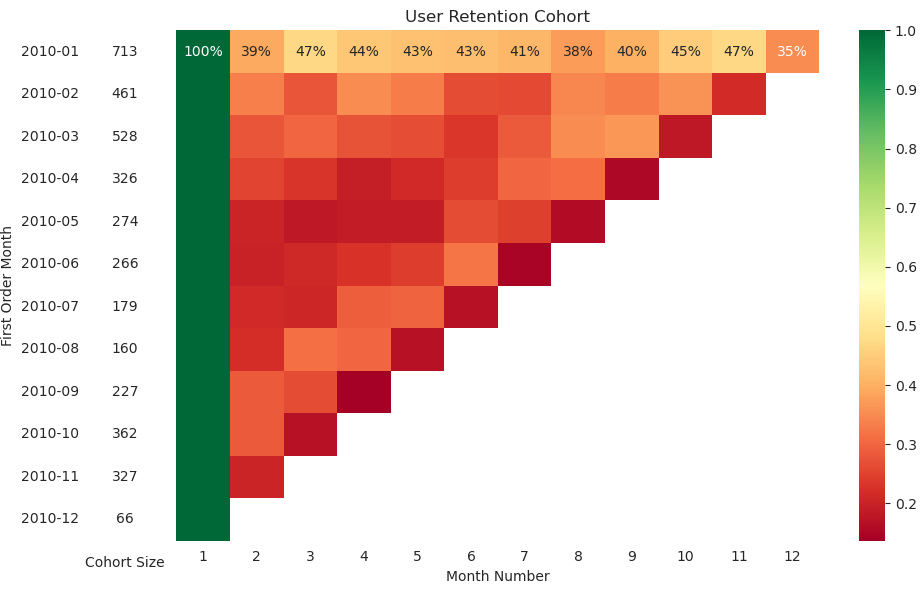

In [47]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

with sns.axes_style('white'):

    fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True, gridspec_kw={'width_ratios':[1, 11]})

    # user retention cohort
    sns.heatmap(df_retention_cohort, annot=True, fmt='.0%', cmap='RdYlGn', ax=ax[1])
    ax[1].set_title('User Retention Cohort')
    ax[1].set(xlabel='Month Number', ylabel='')

    # cohort size
    df_cohort_size = pd.DataFrame(cohort_size)
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(df_cohort_size, annot=True, cbar=False, fmt='g', cmap=white_cmap, ax=ax[0])
    ax[0].tick_params(bottom=False)
    ax[0].set(xlabel='Cohort Size', ylabel='First Order Month', xticklabels=[])

    fig.tight_layout()

## Insight :

1. **Retensi bulan pertama:** Tingkat retensi tertinggi terjadi di bulan pertama untuk semua cohort, yaitu 100%.
2. **Penurunan retensi:** Secara umum, terjadi tren penurunan tingkat retensi seiring berjalannya waktu untuk semua cohort.
3. **Cohort Januari 2010:** Cohort Januari 2010 memiliki tingkat retensi tertinggi di bulan-bulan terakhir dibandingkan cohort lain, dengan tingkat retensi sebesar 47% di bulan ke-12.
4. **Cohort Februari 2010:** Cohort Februari 2010 menunjukkan penurunan signifikan setelah bulan pertama, dengan retensi hanya sebesar 22% di bulan ke-12.
5. **Cohort Juni 2010:** Cohort Juni 2010 menunjukkan sedikit peningkatan retensi di bulan ke-6 (32%) dibandingkan bulan-bulan sebelumnya.
6. **Cohort Juli hingga Desember 2010:** Cohort dari bulan Juli 2010 hingga Desember 2010 umumnya memiliki tingkat retensi yang lebih rendah dibandingkan cohort sebelumnya.
